# Bibliotecas


In [2]:
from flaml import AutoML
from flaml.automl.data import load_openml_dataset

from tensorflow.keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import get_scorer
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector
import shap
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import precision_score, accuracy_score, f1_score, classification_report, confusion_matrix, explained_variance_score ,max_error, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTETomek
import pandas as pd 
# import pandas_profiling complete report
import math 
import seaborn as sns
import numpy as np 
import datetime
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
#from sklearn.preprocessing import OrdinalEncoder
#from sklearn.preprocessing import LabelEncoder
#% matplotlib inline

warnings.simplefilter(action='ignore')

current_date: str = datetime.date.today().strftime("%y-%m-%d")

In [73]:
dataset = r'C:\Users\veron\Desktop\Dissertação\loan_train.csv'
data = pd.read_csv(dataset)
data

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


In [74]:
data.rename(columns = {'Gender':'Gênero (Masc)', 'Married':'Casado','Dependents':'Dependentes','Education':'Educação','Self_Employed':'Trab_Conta_Própria','Applicant_Income':'Renda_Aplicante','Coapplicant_Income':'Renda_Coaplicante','Loan_Amount':'Montante_Empréstimo','Term':'Prazo','Credit_History':'Histórico_Crédito','Area':'Área',
                              'Status':'Estado'}, inplace = True)
data['Gênero (Masc)'].replace(['Male','Female'],['Sim','Não'],inplace=True)
data['Educação'].replace(['Graduate','Not Graduate'],['Sim','Não'],inplace=True)
data['Trab_Conta_Própria'].replace(['Yes','No'],['Sim','Não'],inplace=True)
data['Área'].replace(['Urban','Semiurban'],['Urbano','Semiurbano'],inplace=True)
data['Estado'].replace(['Y','N'],['S','N'],inplace=True)
data['Casado'].replace(['Yes','No'],['Sim','Não'],inplace=True)
data['Histórico_Crédito'].replace([1,0],['Sim','Não'],inplace=True)

data

,Gênero (Masc),Casado,Dependentes,Educação,Trab_Conta_Própria,Renda_Aplicante,Renda_Coaplicante,Montante_Empréstimo,Prazo,Histórico_Crédito,Área,Estado
0,Sim,Não,0,Sim,Não,584900,0.0,15000000,360.0,Sim,Urbano,S
1,Sim,Sim,1,Sim,Não,458300,150800.0,12800000,360.0,Sim,Rural,N
2,Sim,Sim,0,Sim,Sim,300000,0.0,6600000,360.0,Sim,Urbano,S
3,Sim,Sim,0,Não,Não,258300,235800.0,12000000,360.0,Sim,Urbano,S
4,Sim,Não,0,Sim,Não,600000,0.0,14100000,360.0,Sim,Urbano,S
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Não,Não,0,Sim,Não,290000,0.0,7100000,360.0,Sim,Rural,S
610,Sim,Sim,3+,Sim,Não,410600,0.0,4000000,180.0,Sim,Rural,S
611,Sim,Sim,1,Sim,Não,807200,24000.0,25300000,360.0,Sim,Urbano,S
612,Sim,Sim,2,Sim,Não,758300,0.0,18700000,360.0,Sim,Urbano,S


# nulos

In [76]:
print(data.isnull().sum())
data['Gênero (Masc)'].fillna(data['Gênero (Masc)'].mode()[0],inplace = True)
data['Casado'].fillna(data['Casado'].mode()[0],inplace = True)
data['Dependentes'].fillna(data['Dependentes'].mode()[0],inplace = True)
data['Trab_Conta_Própria'].fillna(data['Trab_Conta_Própria'].mode()[0],inplace = True)
data['Histórico_Crédito'].fillna(data['Histórico_Crédito'].mode()[0],inplace = True)
data['Prazo'].fillna(data['Prazo'].mode()[0],inplace = True)

Gênero (Masc)          13
Casado                  3
Dependentes            15
Educação                0
Trab_Conta_Própria     32
Renda_Aplicante         0
Renda_Coaplicante       0
Montante_Empréstimo     0
Prazo                  14
Histórico_Crédito      50
Área                    0
Estado                  0
dtype: int64


# correlação

<Axes: >

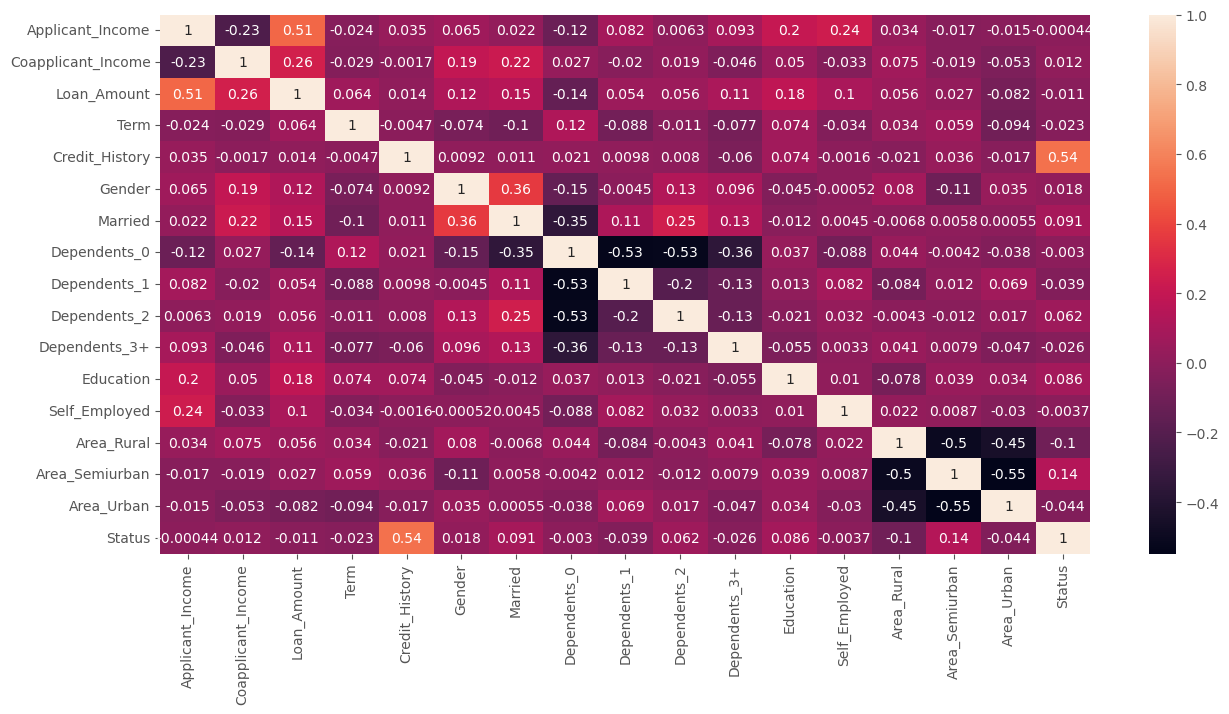

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)


# alvo

In [80]:
data['Prazo'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Prazo, dtype: int64

Y    422
N    192
Name: Status, dtype: int64

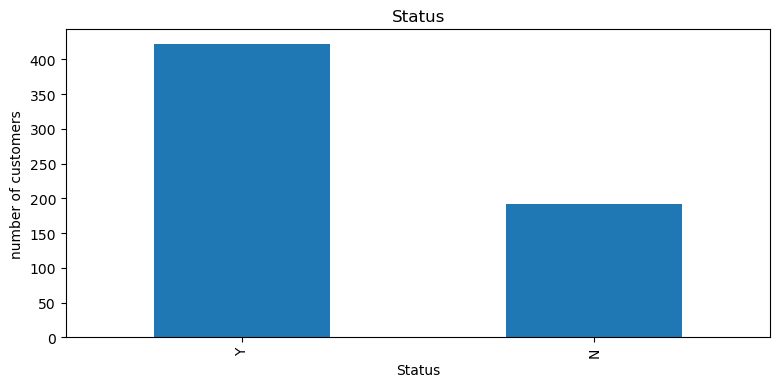

In [23]:
y='Status'
plt.figure(figsize=(20,4))
plt.subplot(121)
data[y].value_counts().plot(kind="bar")
plt.xlabel('Status')
plt.ylabel("number of customers")
plt.title('Status')
data[y].value_counts()

# gráfico categóricas

In [78]:
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

Index(['Gênero (Masc)', 'Casado', 'Dependentes', 'Educação',
       'Trab_Conta_Própria', 'Histórico_Crédito', 'Área', 'Estado'],
      dtype='object')


ValueError: num must be an integer with 1 <= num <= 7, not 8

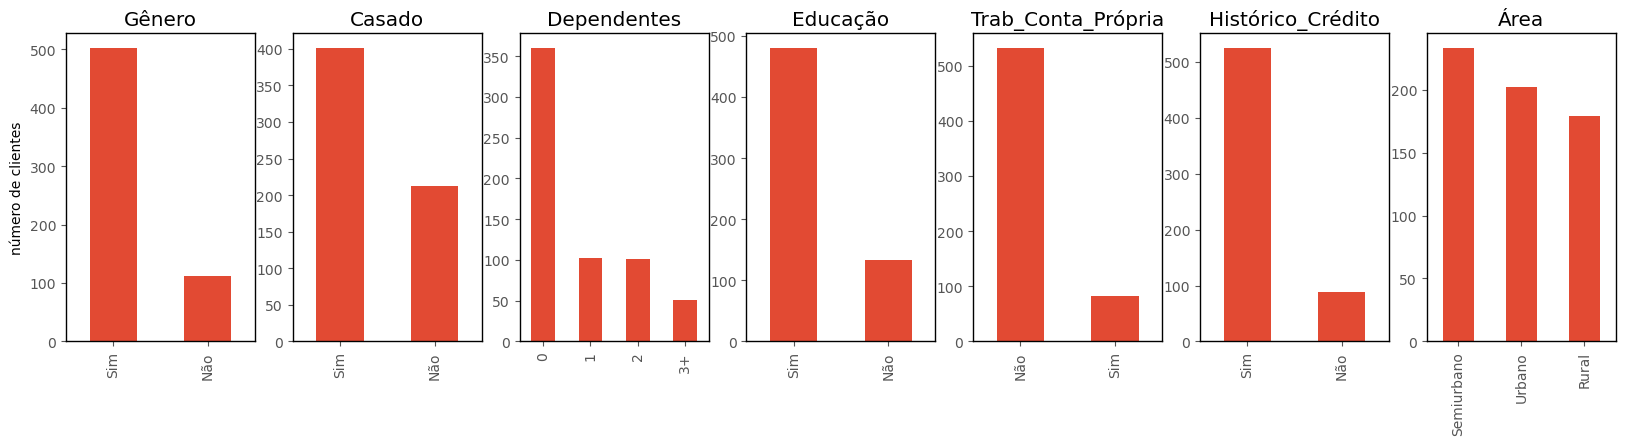

In [210]:
plt.style.use("ggplot")
i=0
plt.figure(figsize=(20,4))
for column in cat_var:
    if column !='Estado':
        i=i+1
        ax=plt.subplot(1, 7, i)
        data[column].value_counts().plot(kind="bar")
        
        ax.set_facecolor("white")
        for spine in ax.spines.values():
          spine.set_edgecolor('black')
        if i==1: plt.ylabel("número de clientes")
        plt.title(column)
for column in ['Histórico_Crédito']:
    i=i+1
    ax=plt.subplot(1, 7, i)
    ax.set_facecolor("white")
    for spine in ax.spines.values():
          spine.set_edgecolor('black')
    data[column].value_counts().plot(kind="bar")
    plt.title(column)


[Text(0, 0.0, '0%'),
 Text(0, 0.2, '20%'),
 Text(0, 0.4, '40%'),
 Text(0, 0.6000000000000001, '60%'),
 Text(0, 0.8, '80%'),
 Text(0, 1.0, '100%'),
 Text(0, 1.2000000000000002, '120%')]

<Figure size 1000x400 with 0 Axes>

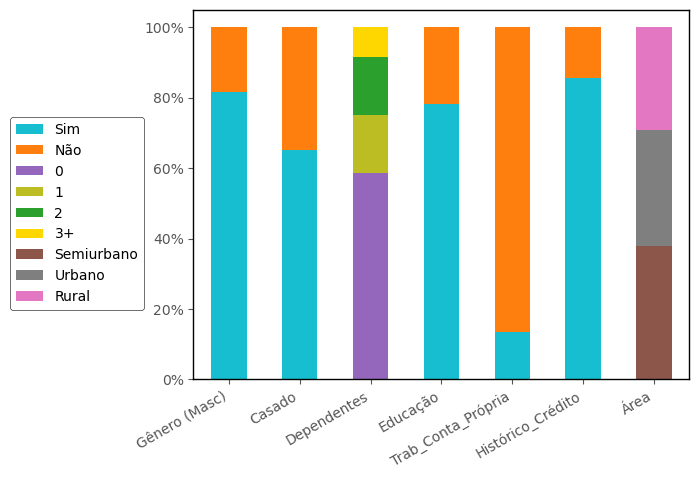

In [79]:
le=len(data)
plt.style.use("ggplot")
i=0
ak=pd.DataFrame()
plt.figure(figsize=(10,4))
for column in cat_var:
    if column !='Estado':
        i=i+1
        #ax=plt.subplot(1, 6, i)#plt.subplot(121)
        ap=pd.DataFrame(data[column].value_counts()).transpose()/len(data)
        #pa.plot(kind="bar", stacked=True)
        #ax=plt.subplot(1, 6, i)
        ak=ak.append(ap)

colors={'0':"tab:purple", '1':"tab:olive",'2':"tab:green",'Sim':"tab:cyan",'Não':"tab:orange",'3+':"gold",'Semiurbano':"tab:brown",'Urbano':"tab:grey",'Rural':"tab:pink"}
ax=ak.plot(kind="bar", stacked=True, color=colors, rot=30)
ax.set_facecolor("white")
plt.xticks(ha='right')
for spine in ax.spines.values():
  spine.set_edgecolor('black')
if i==1: plt.ylabel("número de clientes")
plt.legend(facecolor='white',  edgecolor='black', bbox_to_anchor=(-0.1, 0.71), loc='best', borderaxespad=0)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


1
5


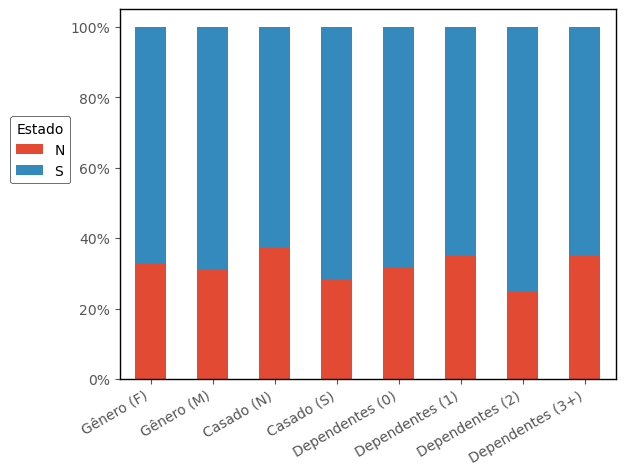

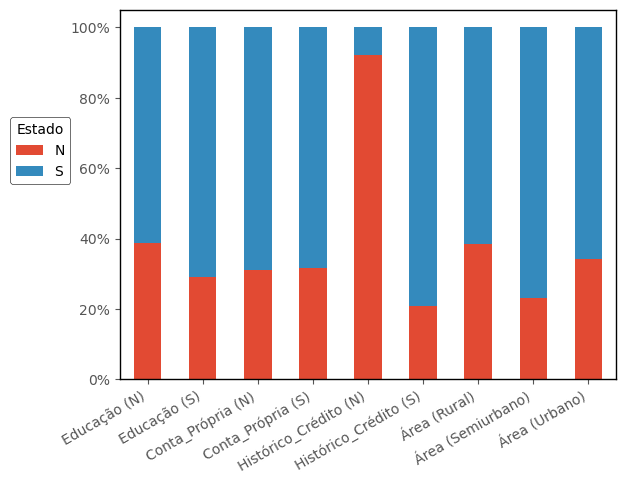

In [68]:
m=['Gênero', 'Casado', 'Dependentes']
n=['Educação', 'Trab_Conta_Própria','Histórico_Crédito', 'Área', 'Estado']
i=1
for j in [m,n]:
    print(i)
    le=len(data)
    plt.style.use("ggplot")
    ak=pd.DataFrame()

    for column in j:
        if column !='Estado':
            i=i+1
            #ax=plt.subplot(1, 6, i)#plt.subplot(121)
            ap=pd.crosstab(data[column],data['Estado'],normalize='index')
            #pa.plot(kind="bar", stacked=True)
            #ax=plt.subplot(1, 6, i)
            ak=ak.append(ap)

    #k.index=['Gênero (N)','Gênero (S)','Casado (N)','Casado (N)','Dependentes (0)','Dependentes (1)','Dependentes (2)','Dependentes (3+)','Educação (N)','Educação (S)','Trab_Conta_Própria (N)','Trab_Conta_Própria (S)','Histórico_Crédito (N)', 'Histórico_Crédito (S)','Área (Rural)','Área(Semiurbano)','Área(Urbano)']
    if j==m:
       ak.index=['Gênero (F)','Gênero (M)','Casado (N)','Casado (S)','Dependentes (0)','Dependentes (1)','Dependentes (2)','Dependentes (3+)'];
    else: 
        ak.index=['Educação (N)','Educação (S)','Conta_Própria (N)','Conta_Própria (S)','Histórico_Crédito (N)', 'Histórico_Crédito (S)','Área (Rural)','Área (Semiurbano)','Área (Urbano)'];
    #colors={'0':"tab:purple", '1':"tab:olive",'2':"tab:green",'Sim':"tab:cyan",'Não':"tab:orange",'3+':"gold",'Semiurbano':"tab:brown",'Urbano':"tab:grey",'Rural':"tab:pink"}
    ax=ak.plot(kind="bar", stacked=True, rot=30)
    ax.set_facecolor("white")
    plt.xticks(ha='right')
    for spine in ax.spines.values():
      spine.set_edgecolor('black')
    if i==1: plt.ylabel("número de clientes")
    plt.legend(facecolor='white',  edgecolor='black', bbox_to_anchor=(-0.1, 0.71), loc='best', borderaxespad=0, title='Estado')
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
    i=i+1


# gráfico contínua

In [27]:
num_var= data.select_dtypes(include=np.number)
num_var.head()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
0,584900,0.0,15000000,360.0,1.0
1,458300,150800.0,12800000,360.0,1.0
2,300000,0.0,6600000,360.0,1.0
3,258300,235800.0,12000000,360.0,1.0
4,600000,0.0,14100000,360.0,1.0


In [222]:


pd.qcut(range(5), data['Renda_Aplicante'].max())

KeyboardInterrupt: 

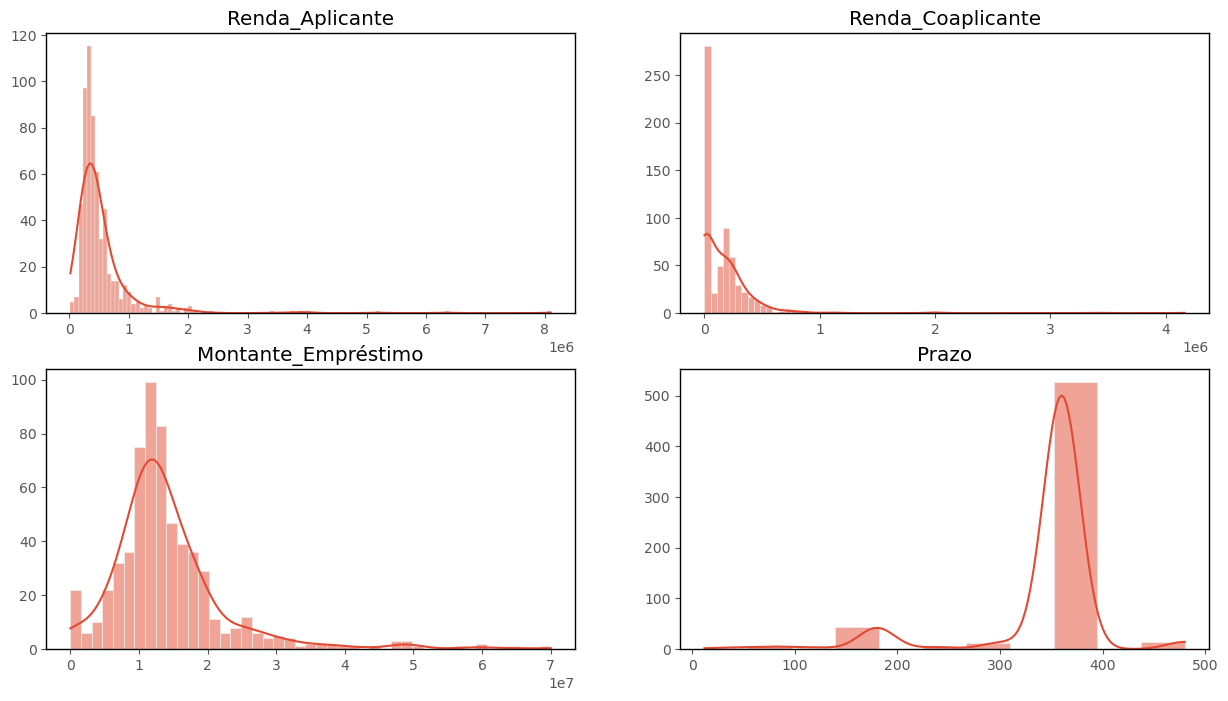

In [220]:
plt.style.use("ggplot")
i=0
plt.figure(figsize=(15,8))
for column in ['Renda_Aplicante','Renda_Coaplicante','Montante_Empréstimo','Prazo']:
    i=i+1
    #plt.figure(figsize=(5,2))
    ax=plt.subplot(2, 2, i)#plt.subplot(121)
    ax.set_facecolor("white")
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
    sns.histplot(data[column], kde=True)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("")
    #plt.title(column)

In [229]:
data['Renda_Aplicante'][data['Estado']=='S']

1       458300
7       303600
9      1284100
13      185300
17      351000
        ...   
596     638300
597     298700
600      41600
605     240000
613     458300
Name: Renda_Aplicante, Length: 192, dtype: int64

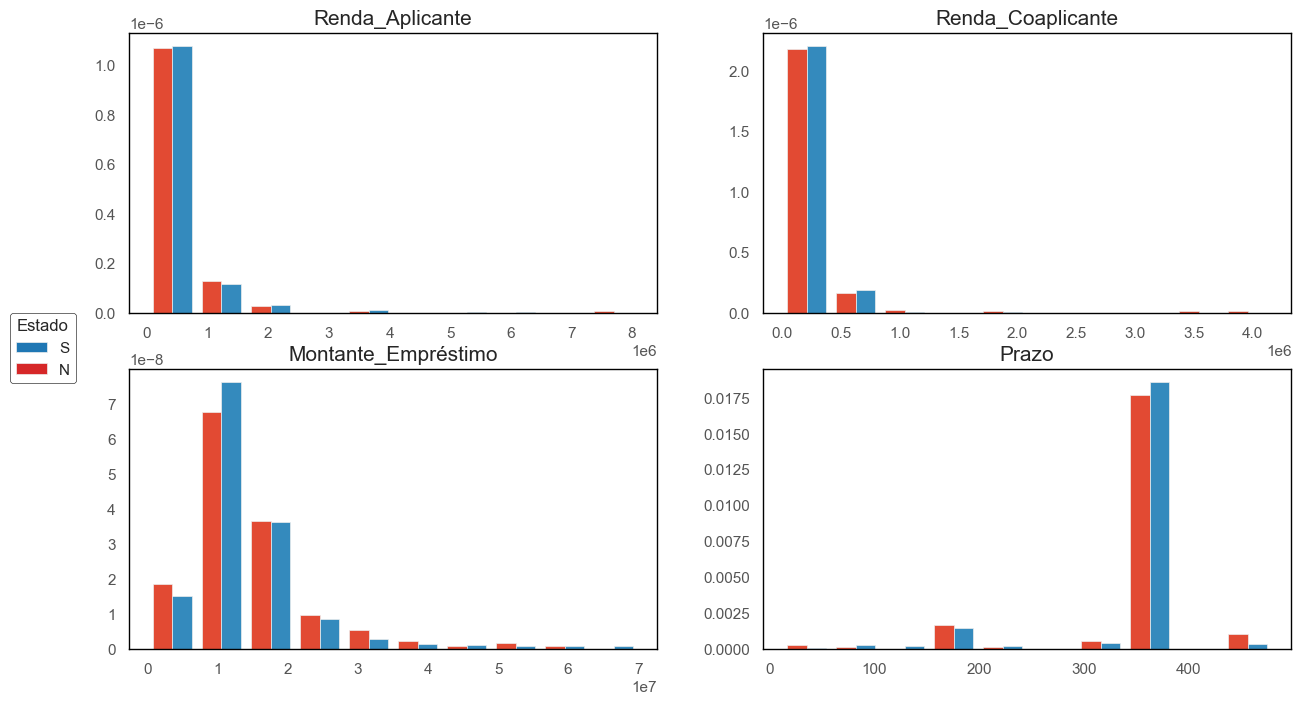

In [275]:
plt.style.use("ggplot")
i=0
from matplotlib.patches import Patch
plt.figure(figsize=(15,8))
for column in ['Renda_Aplicante','Renda_Coaplicante','Montante_Empréstimo','Prazo']:
    i=i+1
    #plt.figure(figsize=(5,2))
    ax=plt.subplot(2, 2, i)#plt.subplot(121)
    ax.set_facecolor("white")
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
    m=data[column][data['Estado']=='N']
    n=data[column][data['Estado']=='S']
    plt.hist([m,n], bins=10, density=True)
    plt.title(column,fontsize = 15)
    if column=='Renda_Aplicante':
      le = [Patch(facecolor='tab:blue',
                         label='S'),Patch(facecolor='tab:red',
                         label='N')]
      plt.legend(handles=le,facecolor='white',  edgecolor='black', bbox_to_anchor=(-0.1, 0), loc='best', borderaxespad=0, title='Estado')
    plt.xlabel("")
    plt.ylabel("")
    #plt.title(column)

Text(0.95, -0.125, '1e7')

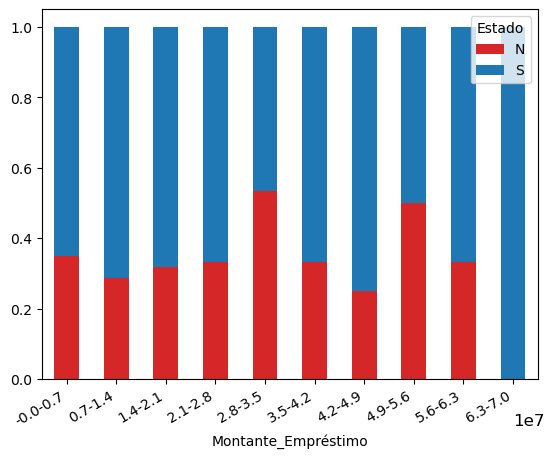

In [67]:

m= pd.cut(data['Montante_Empréstimo']/10**7, bins=10)
m.cat.categories=[f'{"{:.1f}".format(i.left)}-{"{:.1f}".format(i.right)}' for i in m.cat.categories]
m.cat.categories
k=pd.crosstab(m,data['Estado'],normalize='index')
ax=k.plot(kind="bar", stacked=True, rot=30,color={'N':"tab:red", 'S':"tab:blue"})
plt.xticks(ha='right')
plt.text(0.95, -0.125, '1e7', transform=plt.gca().transAxes, fontsize=12)

#ax.set_xticklabels(['{:e}'.format(x) for x in ax.get_xticks()])

In [58]:
m= pd.cut(data['Montante_Empréstimo']/10**7, bins=10)
m.cat.categories

#scientific_notation="{:.1e}".format(17320000)
#print(scientific_notation)

IntervalIndex([(-0.007, 0.7], (0.7, 1.4], (1.4, 2.1], (2.1, 2.8], (2.8, 3.5], (3.5, 4.2], (4.2, 4.9], (4.9, 5.6], (5.6, 6.3], (6.3, 7.0]], dtype='interval[float64, right]')

# bivariado categórico


(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

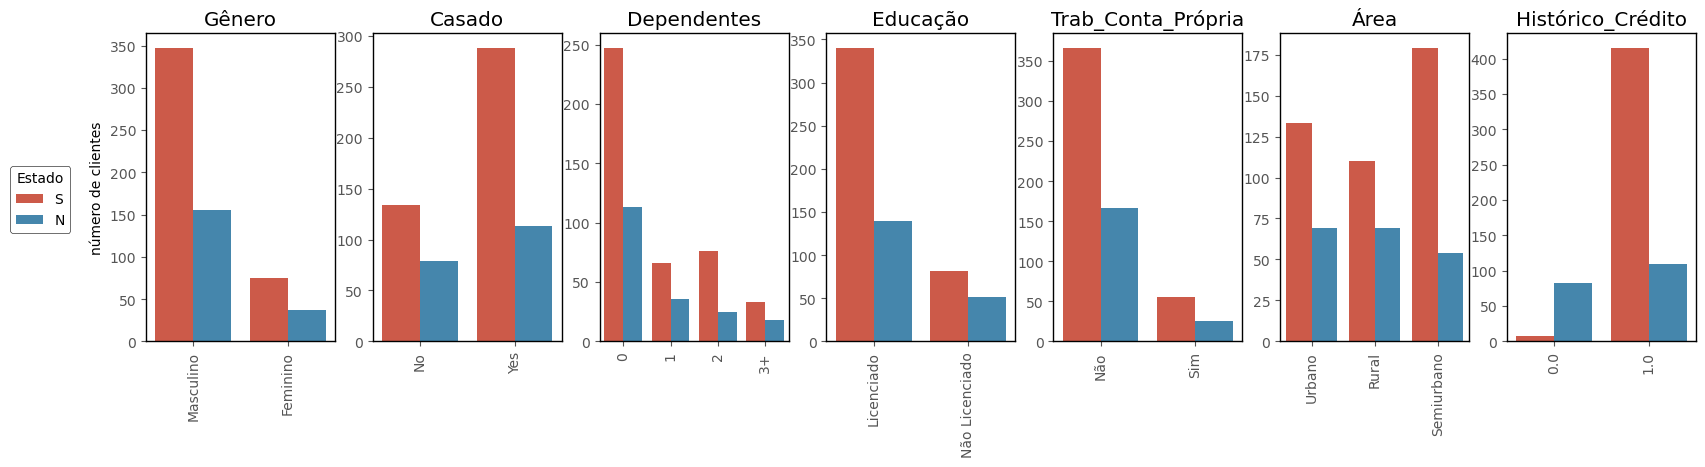

In [106]:
i=0
plt.style.use("ggplot")
plt.figure(figsize=(20,4))
for column in cat_var:
    i=i+1
    if column!='Estado':
        ax=plt.subplot(1, 7, i) #plt.subplot(121)
        ax.set_facecolor("white")
        for spine in ax.spines.values():
          spine.set_edgecolor('black')
        sns.countplot(x=column ,data=data, hue='Estado')
        if i==1:
            plt.ylabel("número de clientes")
            plt.legend(facecolor='white',  edgecolor='black', bbox_to_anchor=(-0.4, 0.57), loc='best', borderaxespad=0,title="Estado")
        else: plt.ylabel(""); plt.legend([], [], frameon=False)
        plt.title(column)
        plt.xlabel("")
        plt.xticks(rotation=90)

column='Histórico_Crédito'
ax=plt.subplot(1, 7, i)
ax.set_facecolor("white")
for spine in ax.spines.values():
          spine.set_edgecolor('black')
sns.countplot(x=column ,data=data, hue='Estado')
plt.legend([], [], frameon=False)
plt.title(column) 
plt.ylabel(""); plt.xlabel("")
plt.xticks(rotation=90)

ValueError: num must be an integer with 1 <= num <= 7, not 8

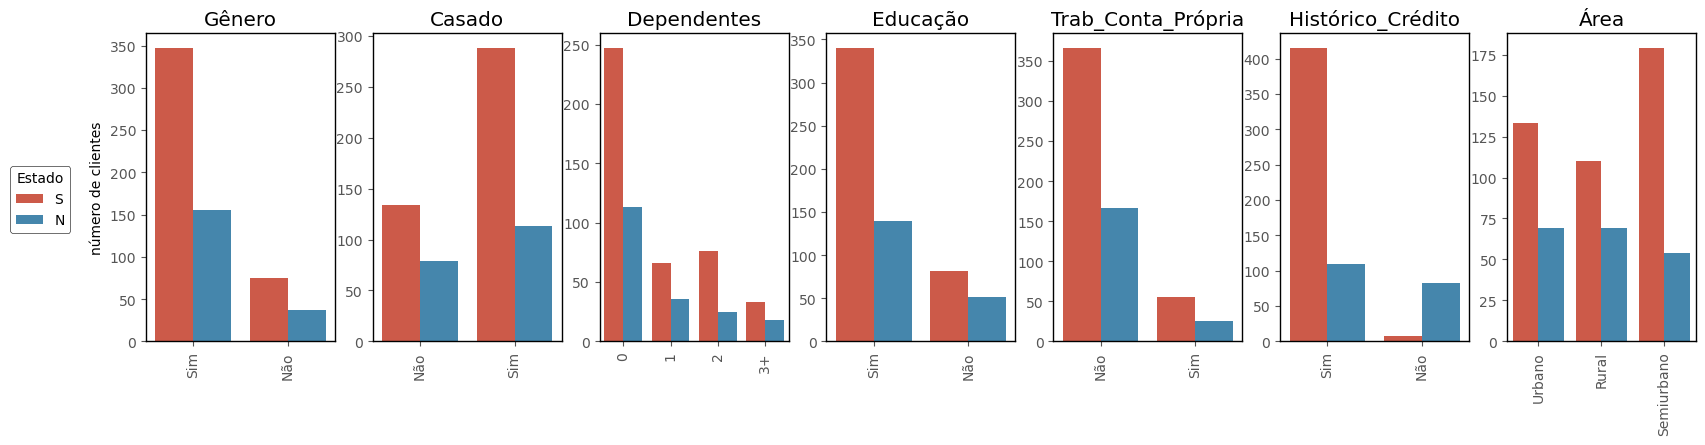

In [144]:
i=0
plt.style.use("ggplot")
plt.figure(figsize=(20,4))
for column in cat_var:
    i=i+1
    if column!='Estado':
        ax=plt.subplot(1, 7, i) #plt.subplot(121)
        ax.set_facecolor("white")
        for spine in ax.spines.values():
          spine.set_edgecolor('black')
        sns.countplot(x=column ,data=data, hue='Estado')
        if i==1:
            plt.ylabel("número de clientes")
            plt.legend(facecolor='white',  edgecolor='black', bbox_to_anchor=(-0.4, 0.57), loc='best', borderaxespad=0,title="Estado")
        else: plt.ylabel(""); plt.legend([], [], frameon=False)
        plt.title(column)
        plt.xlabel("")
        plt.xticks(rotation=90)

column='Histórico_Crédito'
ax=plt.subplot(1, 7, i)
ax.set_facecolor("white")
for spine in ax.spines.values():
          spine.set_edgecolor('black')
sns.countplot(x=column ,data=data, hue='Estado')
plt.legend([], [], frameon=False)
plt.title(column) 
plt.ylabel(""); plt.xlabel("")
plt.xticks(rotation=90)

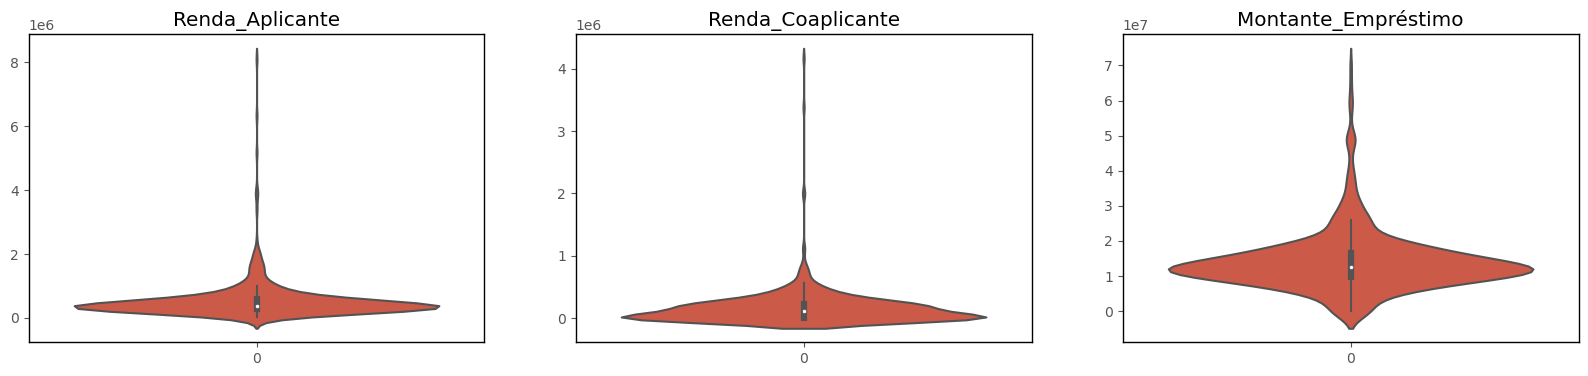

In [109]:
plt.style.use("ggplot")
plt.figure(figsize=(20,4))
i=0
for column in ['Renda_Aplicante','Renda_Coaplicante','Montante_Empréstimo']:
    i=i+1
    ax=plt.subplot(1, 3, i) #plt.subplot(121)
    ax.set_facecolor("white")
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
    sns.violinplot(data[column])
    plt.title(column)

# outliers

In [14]:
print(data.describe())

lower_boundries= []
upper_boundries= []
for i in ['Renda_Aplicante','Renda_Coaplicante','Montante_Empréstimo']:
    IQR= data[i].quantile(0.75) - data[i].quantile(0.25)
    lower_bound= data[i].quantile(0.25) - (1.5*IQR)
    upper_bound= data[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

j = 0
for i in ['Renda_Aplicante','Renda_Coaplicante','Montante_Empréstimo']:
    data.loc[data[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1 

       Applicant_Income  Coapplicant_Income   Loan_Amount        Term  \
count      6.140000e+02        6.140000e+02  6.140000e+02  614.000000   
mean       5.403459e+05        1.621246e+05  1.414104e+07  342.410423   
std        6.109042e+05        2.926248e+05  8.815682e+06   64.428629   
min        1.500000e+04        0.000000e+00  0.000000e+00   12.000000   
25%        2.877500e+05        0.000000e+00  9.800000e+06  360.000000   
50%        3.812500e+05        1.188500e+05  1.250000e+07  360.000000   
75%        5.795000e+05        2.297250e+05  1.647500e+07  360.000000   
max        8.100000e+06        4.166700e+06  7.000000e+07  480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
Applicant_Income : -149875.0 , 1017125.0
Coapplicant_Income : -344587.5 , 574312.5
Loan_Amount : -212500.0 , 26487500.0


# skewness

In [16]:
data[['Renda_Aplicante','Renda_Coaplicante','Montante_Empréstimo']] = data[['Renda_Aplicante','Renda_Coaplicante','Montante_Empréstimo']].apply(lambda x: np.sqrt(x))

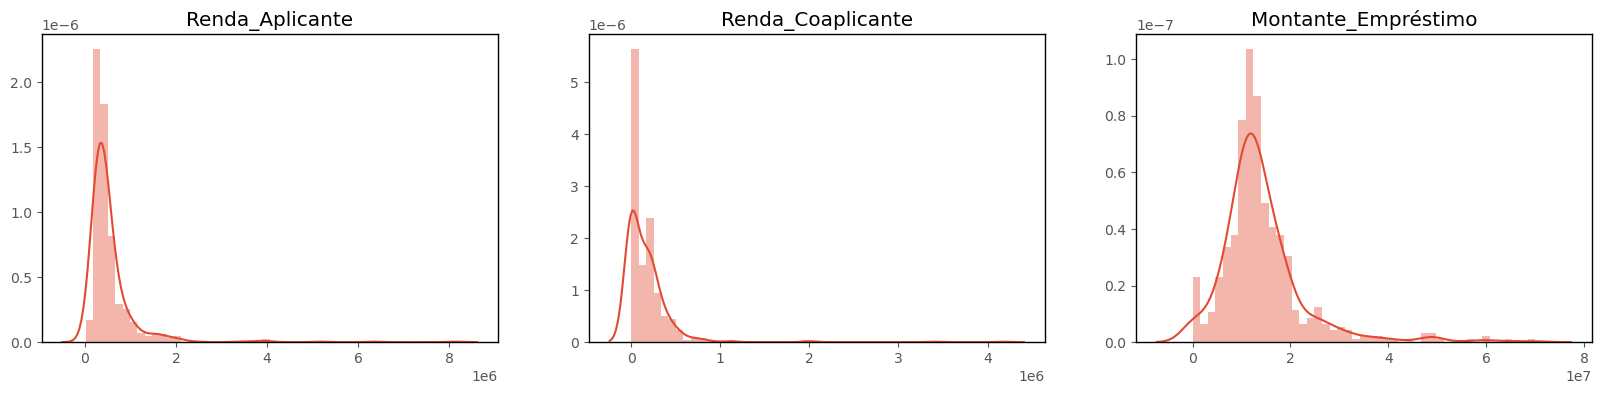

In [117]:
plt.style.use("ggplot")
i=0
plt.figure(figsize=(20,4))
for column in ['Renda_Aplicante','Renda_Coaplicante','Montante_Empréstimo']:
    i=i+1
    #plt.figure(figsize=(5,2))
    ax=plt.subplot(1, 3, i)#plt.subplot(121)
    ax.set_facecolor("white")
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
    sns.distplot(data[column], kde=True)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("")

# encoding

In [18]:
data = pd.get_dummies(data)
data = data.drop(['Gênero_Feminino', 'Casado_Não', 'Educação_Não Licenciado', 
              'Trab_Conta_Própria_Não', 'Estado_N','Histórico_Crédito_Não'], axis = 1)

# Rename columns name
new = {'Gênero_Masculino': 'Gênero', 'Casado_Sim': 'Casado', 
       'Educação_Licenciado': 'Educação', 'Trab_Conta_Própria_Sim': 'Trab_Conta_Própria',
       'Estado_S': 'Estado','Histórico_Crédito_Sim':'Histórico_Crédito'}
       
data.rename(columns=new, inplace=True)

# treino e teste 

In [19]:
x= data.iloc[:, :-1]

# target variable
y= data.iloc[:, -1]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# balancear

In [20]:

smote= SMOTETomek()

#implementing oversampling to training data
x_sm, y_sm= smote.fit_resample(x,y)

# x_sm and y_sm are the resampled data

# target class count of resampled dataset
y_sm.value_counts()

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 42)

# normalizar

In [21]:
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)



# modelos

random forest

In [12]:

# random forest
rf= RandomForestClassifier()

rf_param= { 
           "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
           "max_features": ["auto", "sqrt", "log2"],
#            "max_depth": [4,5,6,7,8],
           "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] 
          }

cv_rf= StratifiedKFold(n_splits=5)

randomsearch_rf= RandomizedSearchCV(rf, rf_param, cv=cv_rf, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

randomsearch_rf.fit(x_train, y_train)
print("best score is:", randomsearch_rf.best_score_)
print("best parameters are:", randomsearch_rf.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.8387472449042116
best parameters are: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'gini'}


logistic regression

In [24]:

# selecting the classifier
log_reg= LogisticRegression()

# selecting hyperparameter tuning
log_param= {"C": 10.0**np.arange(-2,3), "penalty": ["l1", "l2"]}

# defining stratified Kfold cross validation
cv_log= StratifiedKFold(n_splits=5)

# using gridsearch for respective parameters
gridsearch_log= GridSearchCV(log_reg, log_param, cv=cv_log, scoring= "f1_macro", n_jobs=-1, verbose=10)

# fitting the model on resampled data
gridsearch_log.fit(x_train, y_train)

# printing best score and best parameters
#print("best score is:" ,gridsearch_log.best_score_)
#print("best parameters are:" ,gridsearch_log.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro', verbose=10)

redes neurais

teste 1 

In [16]:
def build_classifier(optimizer, neurons, dropout_rate, weight_constraint, init_mode, activation):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(16,), activation=activation, kernel_initializer=init_mode, kernel_constraint=MaxNorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
classifier = KerasClassifier(build_fn = build_classifier)

In [26]:
def build_classifier(neurons, dropout_rate):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(16,), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model
classifier = KerasClassifier(build_fn = build_classifier)

In [27]:
parameters = {'batch_size': [10, 20, 40, 80, 100],
              'epochs': [10, 50, 100],
               'dropout_rate':[0.0, 0.2, 0.4, 0.6, 0.8],
              'neurons':[5, 10, 15, 20, 25, 30]
}
              
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2)
grid_search = grid_search.fit(x_train, y_train,verbose = 0)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

10/10 [==============================] - 0s 2ms/step


10/10 [==============================] - 0s 2ms/step


10/10 [==============================] - 0s 2ms/step
Best Parameters after tuning: {'batch_size': 20, 'dropout_rate': 0.0, 'epochs': 100, 'neurons': 20}
Best Accuracy after tuning: 0.8127090301003345


10 = 1 min 
25 32,  8 16 

teste 2 

In [170]:
model = Sequential()
model.add(Dense(24, input_shape=(16,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=300, batch_size=32)


Epoch 1/300
19/19 [==============================] - 1s 3ms/step - loss: 37.9946 - accuracy: 0.4752
Epoch 2/300
19/19 [==============================] - 0s 3ms/step - loss: 18.6075 - accuracy: 0.5331
Epoch 3/300
19/19 [==============================] - 0s 3ms/step - loss: 13.0887 - accuracy: 0.4917
Epoch 4/300
19/19 [==============================] - 0s 3ms/step - loss: 6.9665 - accuracy: 0.5116
Epoch 5/300
19/19 [==============================] - 0s 3ms/step - loss: 4.3310 - accuracy: 0.4967
Epoch 6/300
19/19 [==============================] - 0s 3ms/step - loss: 2.4544 - accuracy: 0.5364
Epoch 7/300
19/19 [==============================] - 0s 3ms/step - loss: 2.8674 - accuracy: 0.4983
Epoch 8/300
19/19 [==============================] - 0s 3ms/step - loss: 2.2130 - accuracy: 0.5315
Epoch 9/300
19/19 [==============================] - 0s 3ms/step - loss: 2.0611 - accuracy: 0.5464
Epoch 10/300
19/19 [==============================] - 0s 3ms/step - loss: 2.1964 - accuracy: 0.5497
Epoch 

Epoch 83/300
19/19 [==============================] - 0s 5ms/step - loss: 0.7503 - accuracy: 0.6341
Epoch 84/300
19/19 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.6656
Epoch 85/300
19/19 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.6722
Epoch 86/300
19/19 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.6821
Epoch 87/300
19/19 [==============================] - 0s 3ms/step - loss: 0.8629 - accuracy: 0.6639
Epoch 88/300
19/19 [==============================] - 0s 3ms/step - loss: 0.7949 - accuracy: 0.6308
Epoch 89/300
19/19 [==============================] - 0s 3ms/step - loss: 1.0699 - accuracy: 0.6060
Epoch 90/300
19/19 [==============================] - 0s 3ms/step - loss: 0.8101 - accuracy: 0.6970
Epoch 91/300
19/19 [==============================] - 0s 4ms/step - loss: 1.3871 - accuracy: 0.6010
Epoch 92/300
19/19 [==============================] - 0s 3ms/step - loss: 0.7871 - accuracy: 0.6556


19/19 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.7632
Epoch 246/300
19/19 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7550
Epoch 247/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.8063
Epoch 248/300
19/19 [==============================] - 0s 2ms/step - loss: 1.0422 - accuracy: 0.6689
Epoch 249/300
19/19 [==============================] - 0s 2ms/step - loss: 1.1125 - accuracy: 0.6407
Epoch 250/300
19/19 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7649
Epoch 251/300
19/19 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8063
Epoch 252/300
19/19 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.7897
Epoch 253/300
19/19 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7930
Epoch 254/300
19/19 [==============================] - 0s 2ms/step - loss: 0.7222 - accuracy: 0.7235
Epoc

In [171]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

19/19 [==============================] - 0s 2ms/step - loss: 1.2140 - accuracy: 0.5762
Accuracy: 57.62


# automl

In [37]:
y_train=y_train.squeeze()

automl = AutoML()
settings = {
    "time_budget": 200,  # total running time in seconds
    "metric": 'accuracy',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['xgboost'],  # list of ML learners; we tune XGBoost in this example
    "task": 'classification',  # task type
    #"log_file_name": 'houses_experiment.log',  # flaml log file
    "seed": 7654321,  # random seed
}

automl.fit(X_train=x_train, y_train=y_train, **settings)


[flaml.automl.logger: 07-02 19:33:11] {1693} INFO - task = classification
[flaml.automl.logger: 07-02 19:33:11] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 07-02 19:33:11] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-02 19:33:11] {1801} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 07-02 19:33:11] {1911} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl.logger: 07-02 19:33:11] {2221} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 07-02 19:33:11] {2347} INFO - Estimated sufficient time budget=870s. Estimated necessary time budget=1s.
[flaml.automl.logger: 07-02 19:33:11] {2394} INFO -  at 0.1s,	estimator xgboost's best error=0.2131,	best estimator xgboost's best error=0.2131
[flaml.automl.logger: 07-02 19:33:11] {2221} INFO - iteration 1, current learner xgboost
[flaml.automl.logger: 07-02 19:33:11] {2394} INFO -  at 0.2s,	estimator xgboost's best error=0.2131,	best estimator xgboost's best err

[flaml.automl.logger: 07-02 19:33:14] {2221} INFO - iteration 33, current learner xgboost
[flaml.automl.logger: 07-02 19:33:14] {2394} INFO -  at 3.6s,	estimator xgboost's best error=0.1576,	best estimator xgboost's best error=0.1576
[flaml.automl.logger: 07-02 19:33:14] {2221} INFO - iteration 34, current learner xgboost
[flaml.automl.logger: 07-02 19:33:14] {2394} INFO -  at 3.7s,	estimator xgboost's best error=0.1576,	best estimator xgboost's best error=0.1576
[flaml.automl.logger: 07-02 19:33:14] {2221} INFO - iteration 35, current learner xgboost
[flaml.automl.logger: 07-02 19:33:14] {2394} INFO -  at 3.7s,	estimator xgboost's best error=0.1576,	best estimator xgboost's best error=0.1576
[flaml.automl.logger: 07-02 19:33:14] {2221} INFO - iteration 36, current learner xgboost
[flaml.automl.logger: 07-02 19:33:15] {2394} INFO -  at 3.9s,	estimator xgboost's best error=0.1576,	best estimator xgboost's best error=0.1576
[flaml.automl.logger: 07-02 19:33:15] {2221} INFO - iteration 37

[flaml.automl.logger: 07-02 19:33:18] {2394} INFO -  at 7.4s,	estimator xgboost's best error=0.1576,	best estimator xgboost's best error=0.1576
[flaml.automl.logger: 07-02 19:33:18] {2221} INFO - iteration 69, current learner xgboost
[flaml.automl.logger: 07-02 19:33:18] {2394} INFO -  at 7.5s,	estimator xgboost's best error=0.1576,	best estimator xgboost's best error=0.1576
[flaml.automl.logger: 07-02 19:33:18] {2221} INFO - iteration 70, current learner xgboost
[flaml.automl.logger: 07-02 19:33:18] {2394} INFO -  at 7.6s,	estimator xgboost's best error=0.1576,	best estimator xgboost's best error=0.1576
[flaml.automl.logger: 07-02 19:33:18] {2221} INFO - iteration 71, current learner xgboost
[flaml.automl.logger: 07-02 19:33:18] {2394} INFO -  at 7.8s,	estimator xgboost's best error=0.1542,	best estimator xgboost's best error=0.1542
[flaml.automl.logger: 07-02 19:33:18] {2221} INFO - iteration 72, current learner xgboost
[flaml.automl.logger: 07-02 19:33:19] {2394} INFO -  at 7.9s,	es

[flaml.automl.logger: 07-02 19:33:26] {2394} INFO -  at 15.3s,	estimator xgboost's best error=0.1507,	best estimator xgboost's best error=0.1507
[flaml.automl.logger: 07-02 19:33:26] {2221} INFO - iteration 104, current learner xgboost
[flaml.automl.logger: 07-02 19:33:26] {2394} INFO -  at 15.7s,	estimator xgboost's best error=0.1507,	best estimator xgboost's best error=0.1507
[flaml.automl.logger: 07-02 19:33:26] {2221} INFO - iteration 105, current learner xgboost
[flaml.automl.logger: 07-02 19:33:27] {2394} INFO -  at 16.3s,	estimator xgboost's best error=0.1507,	best estimator xgboost's best error=0.1507
[flaml.automl.logger: 07-02 19:33:27] {2221} INFO - iteration 106, current learner xgboost
[flaml.automl.logger: 07-02 19:33:27] {2394} INFO -  at 16.5s,	estimator xgboost's best error=0.1507,	best estimator xgboost's best error=0.1507
[flaml.automl.logger: 07-02 19:33:27] {2221} INFO - iteration 107, current learner xgboost
[flaml.automl.logger: 07-02 19:33:28] {2394} INFO -  at 

[flaml.automl.logger: 07-02 19:33:40] {2394} INFO -  at 29.1s,	estimator xgboost's best error=0.1489,	best estimator xgboost's best error=0.1489
[flaml.automl.logger: 07-02 19:33:40] {2221} INFO - iteration 139, current learner xgboost
[flaml.automl.logger: 07-02 19:33:40] {2394} INFO -  at 29.5s,	estimator xgboost's best error=0.1489,	best estimator xgboost's best error=0.1489
[flaml.automl.logger: 07-02 19:33:40] {2221} INFO - iteration 140, current learner xgboost
[flaml.automl.logger: 07-02 19:33:40] {2394} INFO -  at 29.6s,	estimator xgboost's best error=0.1489,	best estimator xgboost's best error=0.1489
[flaml.automl.logger: 07-02 19:33:40] {2221} INFO - iteration 141, current learner xgboost
[flaml.automl.logger: 07-02 19:33:41] {2394} INFO -  at 29.9s,	estimator xgboost's best error=0.1489,	best estimator xgboost's best error=0.1489
[flaml.automl.logger: 07-02 19:33:41] {2221} INFO - iteration 142, current learner xgboost
[flaml.automl.logger: 07-02 19:33:41] {2394} INFO -  at 

[flaml.automl.logger: 07-02 19:33:50] {2394} INFO -  at 39.6s,	estimator xgboost's best error=0.1489,	best estimator xgboost's best error=0.1489
[flaml.automl.logger: 07-02 19:33:50] {2221} INFO - iteration 174, current learner xgboost
[flaml.automl.logger: 07-02 19:33:50] {2394} INFO -  at 39.8s,	estimator xgboost's best error=0.1489,	best estimator xgboost's best error=0.1489
[flaml.automl.logger: 07-02 19:33:50] {2221} INFO - iteration 175, current learner xgboost
[flaml.automl.logger: 07-02 19:33:51] {2394} INFO -  at 39.9s,	estimator xgboost's best error=0.1489,	best estimator xgboost's best error=0.1489
[flaml.automl.logger: 07-02 19:33:51] {2221} INFO - iteration 176, current learner xgboost
[flaml.automl.logger: 07-02 19:33:51] {2394} INFO -  at 40.3s,	estimator xgboost's best error=0.1489,	best estimator xgboost's best error=0.1489
[flaml.automl.logger: 07-02 19:33:51] {2221} INFO - iteration 177, current learner xgboost
[flaml.automl.logger: 07-02 19:33:51] {2394} INFO -  at 

[flaml.automl.logger: 07-02 19:34:03] {2394} INFO -  at 52.2s,	estimator xgboost's best error=0.1472,	best estimator xgboost's best error=0.1472
[flaml.automl.logger: 07-02 19:34:03] {2221} INFO - iteration 209, current learner xgboost
[flaml.automl.logger: 07-02 19:34:03] {2394} INFO -  at 52.5s,	estimator xgboost's best error=0.1472,	best estimator xgboost's best error=0.1472
[flaml.automl.logger: 07-02 19:34:03] {2221} INFO - iteration 210, current learner xgboost
[flaml.automl.logger: 07-02 19:34:04] {2394} INFO -  at 53.8s,	estimator xgboost's best error=0.1472,	best estimator xgboost's best error=0.1472
[flaml.automl.logger: 07-02 19:34:04] {2221} INFO - iteration 211, current learner xgboost
[flaml.automl.logger: 07-02 19:34:05] {2394} INFO -  at 54.4s,	estimator xgboost's best error=0.1472,	best estimator xgboost's best error=0.1472
[flaml.automl.logger: 07-02 19:34:05] {2221} INFO - iteration 212, current learner xgboost
[flaml.automl.logger: 07-02 19:34:05] {2394} INFO -  at 

[flaml.automl.logger: 07-02 19:34:23] {2394} INFO -  at 72.6s,	estimator xgboost's best error=0.1455,	best estimator xgboost's best error=0.1455
[flaml.automl.logger: 07-02 19:34:23] {2221} INFO - iteration 244, current learner xgboost
[flaml.automl.logger: 07-02 19:34:24] {2394} INFO -  at 73.4s,	estimator xgboost's best error=0.1455,	best estimator xgboost's best error=0.1455
[flaml.automl.logger: 07-02 19:34:24] {2221} INFO - iteration 245, current learner xgboost
[flaml.automl.logger: 07-02 19:34:25] {2394} INFO -  at 74.0s,	estimator xgboost's best error=0.1455,	best estimator xgboost's best error=0.1455
[flaml.automl.logger: 07-02 19:34:25] {2221} INFO - iteration 246, current learner xgboost
[flaml.automl.logger: 07-02 19:34:25] {2394} INFO -  at 74.4s,	estimator xgboost's best error=0.1455,	best estimator xgboost's best error=0.1455
[flaml.automl.logger: 07-02 19:34:25] {2221} INFO - iteration 247, current learner xgboost
[flaml.automl.logger: 07-02 19:34:25] {2394} INFO -  at 

[flaml.automl.logger: 07-02 19:34:46] {2394} INFO -  at 95.4s,	estimator xgboost's best error=0.1455,	best estimator xgboost's best error=0.1455
[flaml.automl.logger: 07-02 19:34:46] {2221} INFO - iteration 279, current learner xgboost
[flaml.automl.logger: 07-02 19:34:47] {2394} INFO -  at 96.1s,	estimator xgboost's best error=0.1455,	best estimator xgboost's best error=0.1455
[flaml.automl.logger: 07-02 19:34:47] {2221} INFO - iteration 280, current learner xgboost
[flaml.automl.logger: 07-02 19:34:47] {2394} INFO -  at 96.6s,	estimator xgboost's best error=0.1455,	best estimator xgboost's best error=0.1455
[flaml.automl.logger: 07-02 19:34:47] {2221} INFO - iteration 281, current learner xgboost
[flaml.automl.logger: 07-02 19:34:48] {2394} INFO -  at 96.9s,	estimator xgboost's best error=0.1455,	best estimator xgboost's best error=0.1455
[flaml.automl.logger: 07-02 19:34:48] {2221} INFO - iteration 282, current learner xgboost
[flaml.automl.logger: 07-02 19:34:49] {2394} INFO -  at 

[flaml.automl.logger: 07-02 19:35:09] {2221} INFO - iteration 313, current learner xgboost
[flaml.automl.logger: 07-02 19:35:10] {2394} INFO -  at 119.0s,	estimator xgboost's best error=0.1437,	best estimator xgboost's best error=0.1437
[flaml.automl.logger: 07-02 19:35:10] {2221} INFO - iteration 314, current learner xgboost
[flaml.automl.logger: 07-02 19:35:11] {2394} INFO -  at 120.3s,	estimator xgboost's best error=0.1437,	best estimator xgboost's best error=0.1437
[flaml.automl.logger: 07-02 19:35:11] {2221} INFO - iteration 315, current learner xgboost
[flaml.automl.logger: 07-02 19:35:12] {2394} INFO -  at 120.9s,	estimator xgboost's best error=0.1437,	best estimator xgboost's best error=0.1437
[flaml.automl.logger: 07-02 19:35:12] {2221} INFO - iteration 316, current learner xgboost
[flaml.automl.logger: 07-02 19:35:13] {2394} INFO -  at 122.1s,	estimator xgboost's best error=0.1437,	best estimator xgboost's best error=0.1437
[flaml.automl.logger: 07-02 19:35:13] {2221} INFO - 

[flaml.automl.logger: 07-02 19:35:41] {2221} INFO - iteration 348, current learner xgboost
[flaml.automl.logger: 07-02 19:35:42] {2394} INFO -  at 150.8s,	estimator xgboost's best error=0.1437,	best estimator xgboost's best error=0.1437
[flaml.automl.logger: 07-02 19:35:42] {2221} INFO - iteration 349, current learner xgboost
[flaml.automl.logger: 07-02 19:35:42] {2394} INFO -  at 151.4s,	estimator xgboost's best error=0.1437,	best estimator xgboost's best error=0.1437
[flaml.automl.logger: 07-02 19:35:42] {2221} INFO - iteration 350, current learner xgboost
[flaml.automl.logger: 07-02 19:35:43] {2394} INFO -  at 152.4s,	estimator xgboost's best error=0.1437,	best estimator xgboost's best error=0.1437
[flaml.automl.logger: 07-02 19:35:43] {2221} INFO - iteration 351, current learner xgboost
[flaml.automl.logger: 07-02 19:35:44] {2394} INFO -  at 153.3s,	estimator xgboost's best error=0.1437,	best estimator xgboost's best error=0.1437
[flaml.automl.logger: 07-02 19:35:44] {2221} INFO - 

[flaml.automl.logger: 07-02 19:36:14] {2221} INFO - iteration 383, current learner xgboost
[flaml.automl.logger: 07-02 19:36:15] {2394} INFO -  at 184.1s,	estimator xgboost's best error=0.1437,	best estimator xgboost's best error=0.1437
[flaml.automl.logger: 07-02 19:36:15] {2221} INFO - iteration 384, current learner xgboost
[flaml.automl.logger: 07-02 19:36:15] {2394} INFO -  at 184.6s,	estimator xgboost's best error=0.1437,	best estimator xgboost's best error=0.1437
[flaml.automl.logger: 07-02 19:36:15] {2221} INFO - iteration 385, current learner xgboost
[flaml.automl.logger: 07-02 19:36:16] {2394} INFO -  at 185.0s,	estimator xgboost's best error=0.1437,	best estimator xgboost's best error=0.1437
[flaml.automl.logger: 07-02 19:36:16] {2221} INFO - iteration 386, current learner xgboost
[flaml.automl.logger: 07-02 19:36:17] {2394} INFO -  at 186.1s,	estimator xgboost's best error=0.1437,	best estimator xgboost's best error=0.1437
[flaml.automl.logger: 07-02 19:36:17] {2221} INFO - 

In [38]:
print('Best hyperparmeter config:', automl.best_config)
#print('Best mae on validation data: {0:.4g}'.format(1-automl.best_loss))
#print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))
print(automl.model.estimator)
d=automl.model.estimator
y_pred_automl = d.predict(x_test)

Best hyperparmeter config: {'n_estimators': 322, 'max_leaves': 15, 'min_child_weight': 0.28075631583808697, 'learning_rate': 1.0, 'subsample': 0.5404577131504885, 'colsample_bylevel': 0.46584894296832485, 'colsample_bytree': 0.7114337543429448, 'reg_alpha': 0.0025752595612070586, 'reg_lambda': 1024.0}
XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.46584894296832485, colsample_bynode=None,
              colsample_bytree=0.7114337543429448, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=0,
              max_leaves=15, min_child_weight=0.28075631583808697, missing=nan,
              monotone_constraints=None, n_estimator

In [39]:
accuracy = accuracy_score(y_test, y_pred_automl)
print('accuracy '+' test score: {:.2f}'.format(accuracy))

accuracy  test score: 0.90


# feature importances

In [19]:
m=randomsearch_rf.best_params_
#str(m).str[1:-1]
str(m).replace('{', '').replace('}', '')


"'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 25, 'criterion': 'gini'"

In [90]:

rf=RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)
importances = rf.feature_importances_
feature_importances=pd.DataFrame({'feature': list(x.columns),
                                 'importance': importances}).\
    sort_values('importance', ascending=False)
feature_importances 

,feature,importance
4,Credit_History,0.306150
2,Loan_Amount,0.151241
0,Applicant_Income,0.141206
1,Coapplicant_Income,0.091155
14,Area_Semiurban,0.044530
7,Dependents_0,0.037875
6,Married,0.036950
3,Term,0.033865
11,Education,0.024207
5,Gender,0.023710


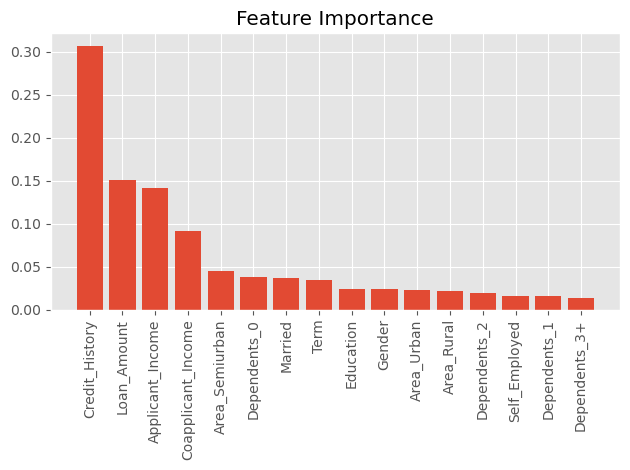

In [91]:
plt.title('Feature Importance')
sorted_indices = np.argsort(importances)[::-1]
plt.bar(range(x_train.shape[1]), importances[sorted_indices ], align='center')
plt.xticks(range(x_train.shape[1]), x.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# SHAP

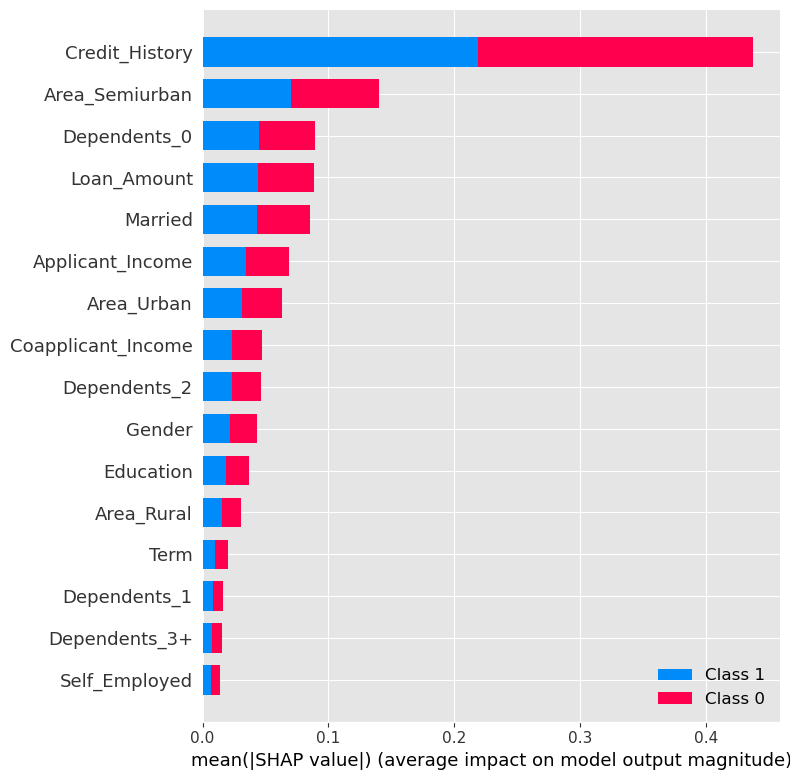

In [93]:
shap.initjs()
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_train)
shap.summary_plot( shap_values, features=x_train, feature_names=x.columns, plot_type='bar' )

In [132]:
shap.force_plot(explainer.expected_value[0],shap_values[0][0,:], x_train.iloc[0])
#shap.force_plot(explainer.expected_value,shap_values[2,:], x_train.iloc[0])


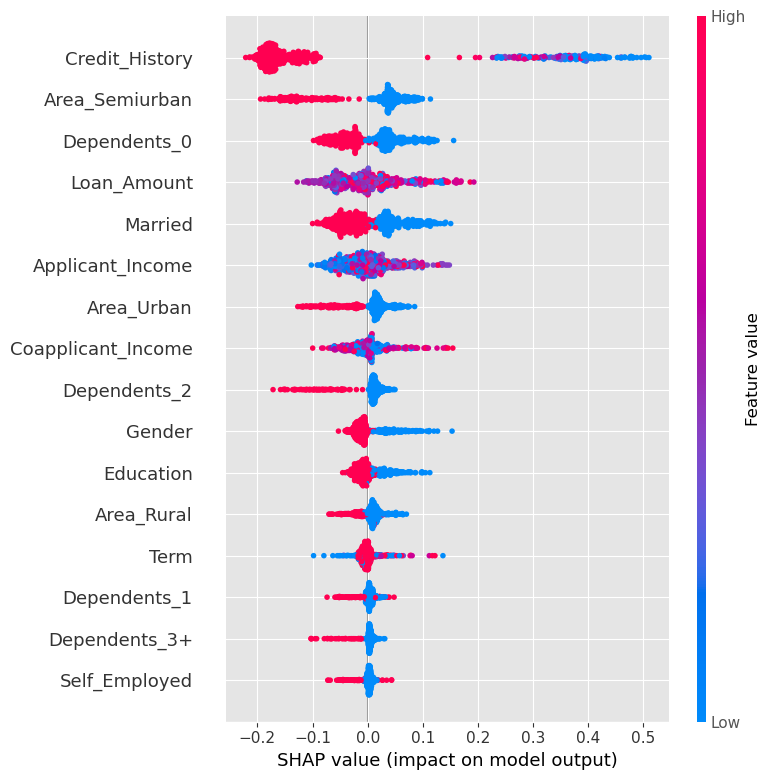

In [134]:
shap.summary_plot(shap_values[0], x_train)

In [136]:
 shap.force_plot(explainer.expected_value[0], shap_values[0], x_train)

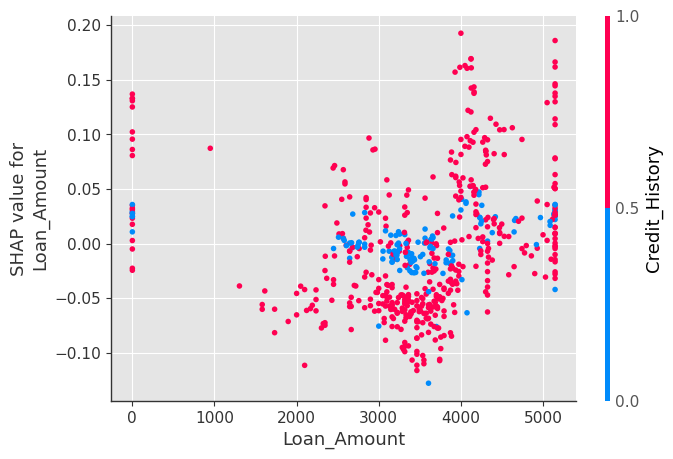

In [146]:
shap.dependence_plot(2, shap_values[0], x_train, show=False)


# sequential feature selector

In [78]:
rf=RandomForestClassifier(random_state=0)

rf.fit(x_train,y_train)
bfs1=SequentialFeatureSelector(rf,k_features=(1,16),forward=False,n_jobs=-1,cv=5)
bfs1.fit(x_train,y_train)
features1=list(bfs1.k_feature_names_)

rf=RandomForestClassifier(random_state=0)

rf.fit(x_train[features1],y_train)
print(features1)
y_pred=rf.predict(x_test[features1])
accuracy=accuracy_score(y_test, y_pred)
print('accuracy score: '+ str(accuracy) )

['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Credit_History', 'Gender', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Self_Employed', 'Area_Urban']
accuracy score: 0.8157894736842105
